In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import dateutil
import datetime

from pycountry import countries
from data_loading import TwitterDataLoader, WhoDataLoader
from series_analysis import decompose

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 6]

In [6]:
twitter_data_loader = TwitterDataLoader('./data/twitter/')
who_data_loader = WhoDataLoader('./data/who/')

## process data for each country locally

In [7]:
def get_countries_summary_df(
    twitter_data_loader,
    who_data_loader,
    dates_range=('8 mar 2020', '11 apr 2020'),
    smoothing_window_size=5,
    correlation_type='pearson'
):
    results_df = pd.DataFrame(columns=[
        'alpha_2',
        
        'twitter_raw',
        'twitter_smooth',
        
        'who_conf_raw',
        'who_conf_smooth',
        
        'who_deaths_raw',
        'who_deaths_smooth',
        
        'who_rec_raw',
        'who_rec_smooth',
        
        'corr_twt_conf',
        'corr_twt_deaths',
        'corr_twt_rec'
    ])
    
    alpha_codes = [c.alpha_2 for c in countries]
    for code in alpha_codes:
        try:
            record = {'alpha_2': code}
            
            # process twitter data
            twitter_raw = twitter_data_loader.get_data(code, dates_range)
            twitter_smooth = decompose(twitter_raw, smoothing_window_size)['trend']
            
            record['twitter_raw'] = twitter_raw
            record['twitter_smooth'] = twitter_smooth
            
            for who_source in ['conf', 'deaths', 'rec']:
                who_raw = who_data_loader.get_data(code, who_source, dates_range)
                who_smooth = decompose(who_raw, smoothing_window_size)['trend']
                corr = twitter_smooth.corr(who_smooth, method=correlation_type)
                
                record[f'who_{who_source}_raw'] = who_raw
                record[f'who_{who_source}_smooth'] = who_smooth
                record[f'corr_twt_{who_source}'] = corr
            
            results_df = results_df.append(record, ignore_index=True)

        except KeyError:
            pass
        
    results_df = results_df.set_index('alpha_2')
    return results_df

In [33]:
%%time
summary_df = get_countries_summary_df(twitter_data_loader, who_data_loader, correlation_type='pearson')
summary_df.head()

CPU times: user 5.05 s, sys: 55.6 ms, total: 5.11 s
Wall time: 5.11 s


,twitter_raw,twitter_smooth,who_conf_raw,who_conf_smooth,who_deaths_raw,who_deaths_smooth,who_rec_raw,who_rec_smooth,corr_twt_conf,corr_twt_deaths,corr_twt_rec
alpha_2,,,,,,,,,,,
AF,2020-03-08 231 2020-03-09 165 2020-03-10...,2020-03-10 208.2 2020-03-11 207.6 2020-0...,2020-03-08 3.0 2020-03-09 0.0 2020-03-...,2020-03-10 1.2 2020-03-11 0.6 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,0.903510,0.746909,0.763409
AO,2020-03-08 131 2020-03-09 120 2020-03-10...,2020-03-10 140.8 2020-03-11 150.2 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,-0.337428,0.091132,-0.432513
AL,2020-03-08 134 2020-03-09 210 2020-03-...,2020-03-10 162.4 2020-03-11 161.0 2020...,2020-03-08 0.0 2020-03-09 2.0 2020-03-...,2020-03-10 4.6 2020-03-11 6.6 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.2 2020-03-11 0.2 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-...,0.411382,0.187094,0.824982
AD,2020-03-08 122 2020-03-09 128 2020-03-10...,2020-03-10 167.8 2020-03-11 183.8 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.2 2020-03-11 0.0 2020-03-12...,0.558345,0.496685,0.334234
AE,2020-03-08 2355 2020-03-09 2388 2020-03-...,2020-03-10 2169.8 2020-03-11 2091.4 2020...,2020-03-08 0.0 2020-03-09 0.0 2020-0...,2020-03-10 8.0 2020-03-11 8.0 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-0...,2020-03-10 2.0 2020-03-11 2.0 2020-03-...,0.541761,0.613247,0.374161


corr_twt_conf      -0.712414
corr_twt_deaths    0.0253068
corr_twt_rec        0.291321
Name: CH, dtype: object


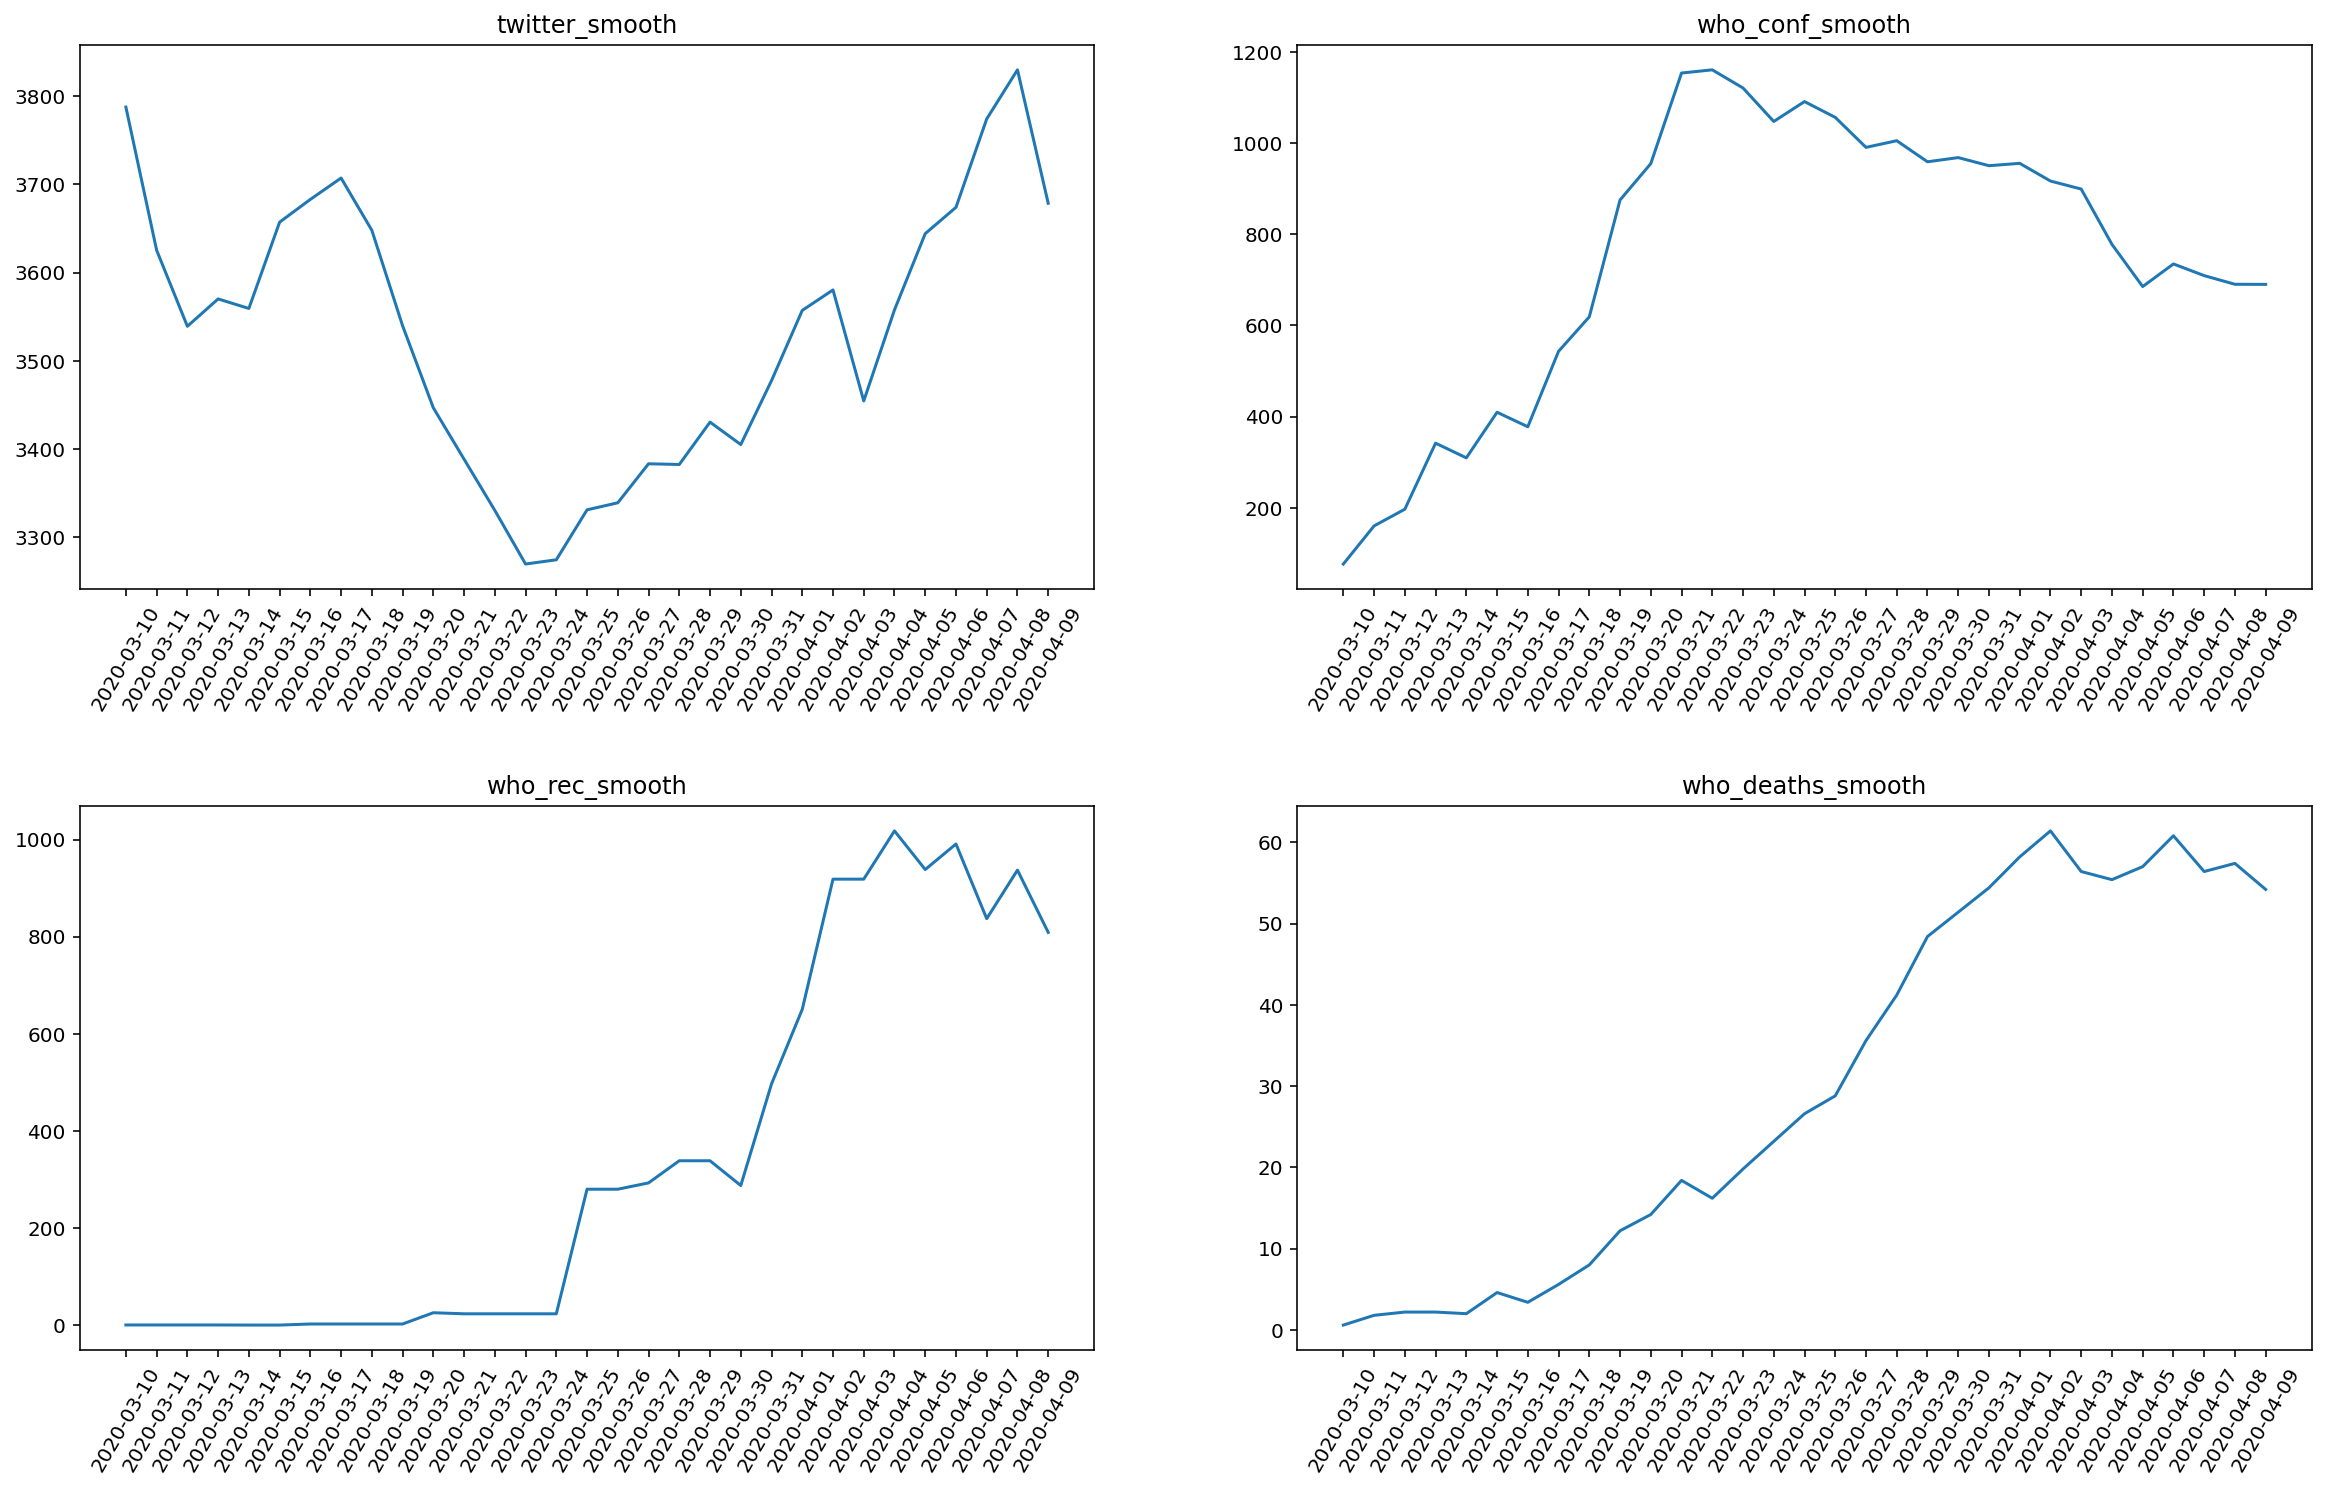

In [70]:
code = 'CH'
country_summary = summary_df.loc[code]

series_list = ['twitter_smooth', 'who_conf_smooth', 'who_rec_smooth', 'who_deaths_smooth']

print(country_summary[-3:])

plt.figure(figsize=(20, 12))

for i, series_name in enumerate(series_list):
    plt.subplot(2, 2, i + 1)
    plt.xticks(rotation=60)
    plt.plot(country_summary[series_name])
    plt.subplots_adjust(hspace=0.4)
    plt.title(series_name)

## calculate inter-country series correlations

In [68]:
def get_inter_country_correlations(series_df, country_code, correlation_type='pearson'):
    target_series = series_df[country_code]
    result_df = pd.DataFrame(columns=['alpha_2', 'corr'])
    
    for code, series in series_df.iteritems():
        record = {
            'alpha_2': code,
            'corr': series.corr(target_series, method=correlation_type)
        }
        result_df = result_df.append(record, ignore_index=True)
        
    result_df = result_df.set_index('alpha_2')
    return result_df

In [71]:
code = 'CH'
inter_corrs = get_inter_country_correlations(summary_df['twitter_smooth'], code)
inter_corrs.sort_values('corr', ascending=False).head(20)

,corr
alpha_2,
CH,1.000000
MC,0.812302
GR,0.807523
PL,0.708182
MK,0.696642
SI,0.687219
PE,0.665595
IE,0.664592
CY,0.626869
